In [16]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


import joblib
import warnings
warnings.filterwarnings('ignore')

In [20]:
data=pd.read_csv('Rainfall.csv')
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [21]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [22]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

We can see there are many Null values in the data 

In [24]:
round(data.isna().sum() / len(data), 3)

Date             0.000
Location         0.000
MinTemp          0.009
MaxTemp          0.007
Rainfall         0.028
Evaporation      0.417
Sunshine         0.474
WindGustDir      0.118
WindGustSpeed    0.118
WindDir9am       0.098
WindDir3pm       0.037
WindSpeed9am     0.009
WindSpeed3pm     0.013
Humidity9am      0.007
Humidity3pm      0.012
Pressure9am      0.155
Pressure3pm      0.156
Cloud9am         0.287
Cloud3pm         0.291
Temp9am          0.007
Temp3pm          0.011
RainToday        0.028
RainTomorrow     0.028
dtype: float64

as we can see that some values are missing in every columns

In [25]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [26]:
for col in data.columns:
    print('\n')
    print(col)
    print('-'*15)
    print(data[col].value_counts(normalize=True).head())



Date
---------------
2011-01-31    0.000593
2011-05-08    0.000593
2011-05-21    0.000593
2011-05-20    0.000593
2011-05-19    0.000593
Name: Date, dtype: float64


Location
---------------
Melbourne       0.192522
Williamtown     0.145994
PerthAirport    0.142908
Albury          0.107656
Newcastle       0.097567
Name: Location, dtype: float64


MinTemp
---------------
12.0    0.008862
13.2    0.008503
13.8    0.008263
12.7    0.008144
16.4    0.008024
Name: MinTemp, dtype: float64


MaxTemp
---------------
19.0    0.010400
23.8    0.008966
19.8    0.008846
25.0    0.008488
22.0    0.008129
Name: MaxTemp, dtype: float64


Rainfall
---------------
0.0    0.647404
0.2    0.049603
0.4    0.021625
0.6    0.014172
1.2    0.010507
Name: Rainfall, dtype: float64


Evaporation
---------------
4.0    0.036637
3.0    0.033177
2.4    0.029921
2.2    0.029717
2.6    0.029106
Name: Evaporation, dtype: float64


Sunshine
---------------
0.0     0.037463
11.1    0.015346
11.2    0.015121
11.0    0.

In [27]:
data.Date.value_counts()

2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64

In [28]:
data.Location.nunique()

12

Adjusting the RainToday and RainTomorrow columns

In [29]:
data.RainToday = data.RainToday.map({'No': 0, 'Yes': 1})
data.RainToday.value_counts(normalize=True)

0.0    0.756872
1.0    0.243128
Name: RainToday, dtype: float64

In [30]:
data.RainTomorrow = data.RainTomorrow.map({'No': 0, 'Yes': 1})
data.RainTomorrow.value_counts(normalize=True)

0.0    0.75678
1.0    0.24322
Name: RainTomorrow, dtype: float64

Text(0.5, 1.0, 'Histograms of Columns')

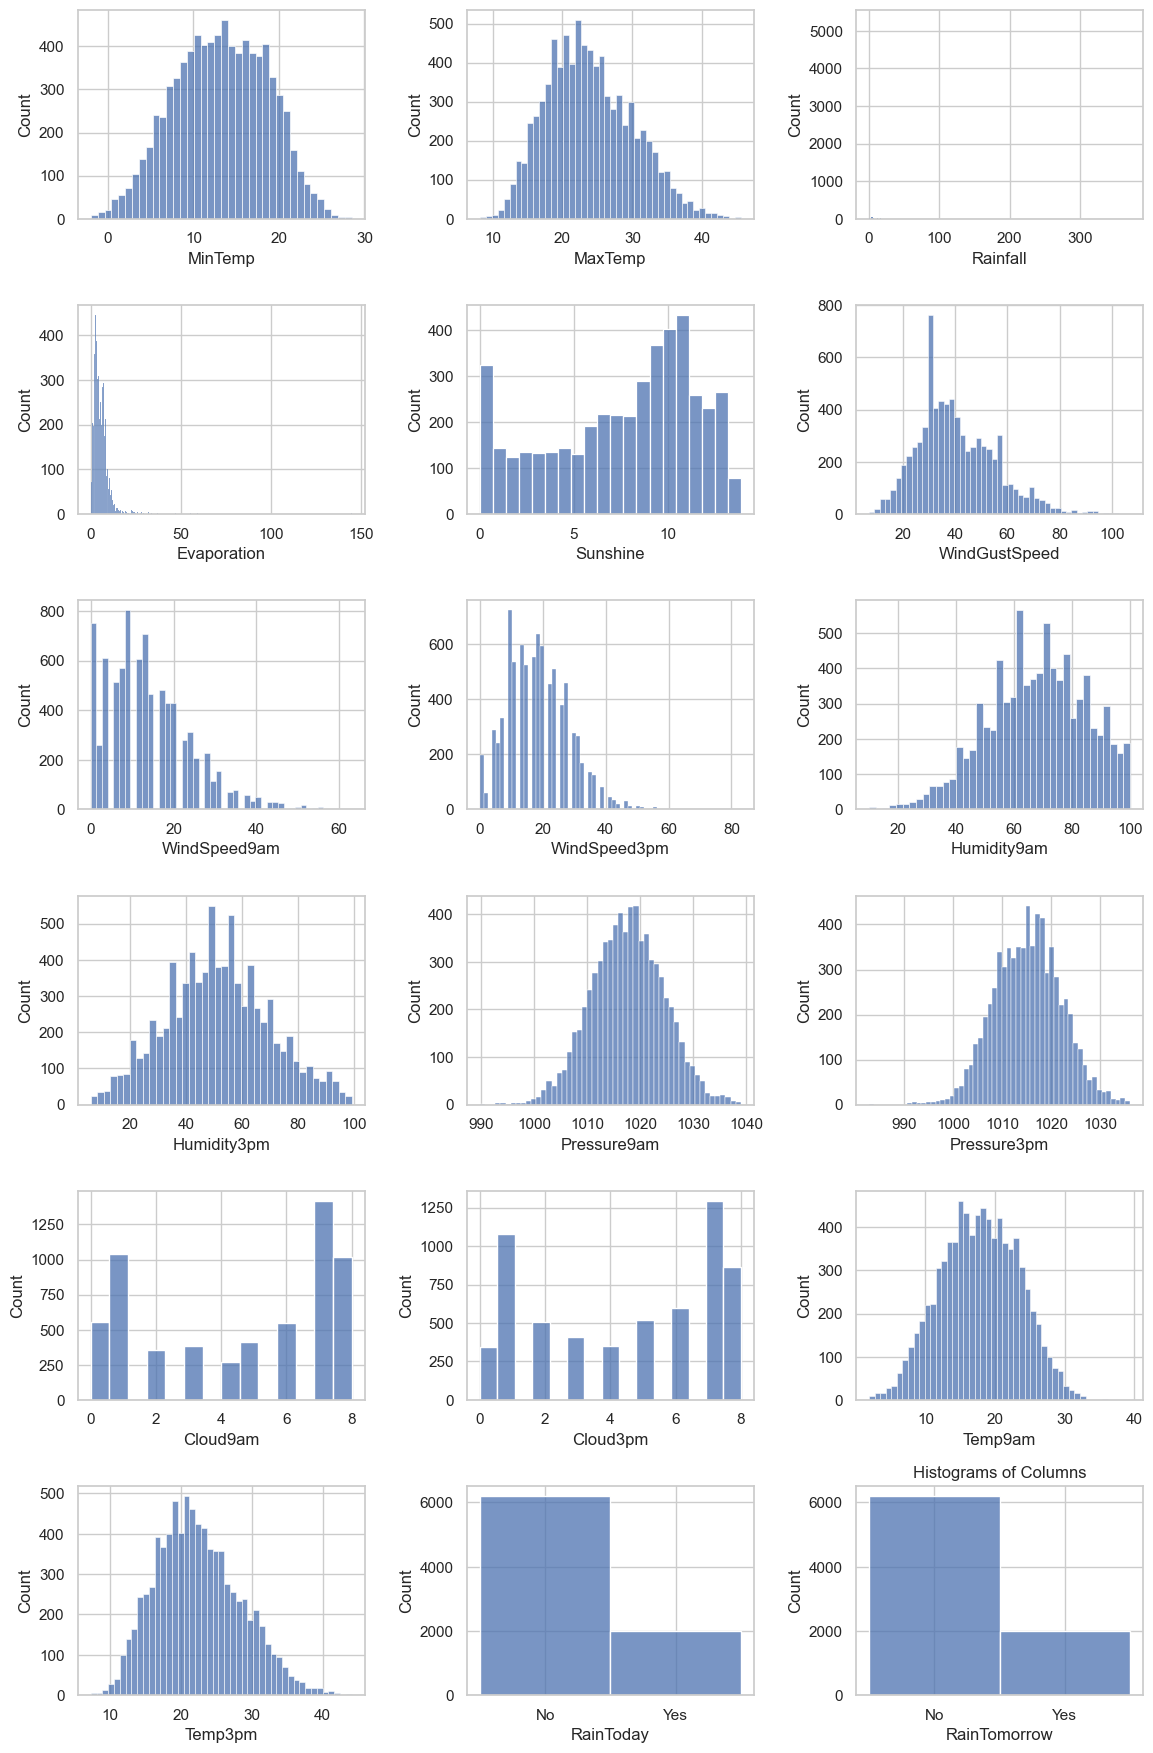

In [32]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(12, 18))
axes = axes.reshape(-1)

continuous = [col for col in df.columns if data[col].dtype != object]
for i, col in enumerate(continuous):
    sns.histplot(df[col], ax=axes[i])

fig.tight_layout(pad=2.0)
plt.title('Histograms of Columns')


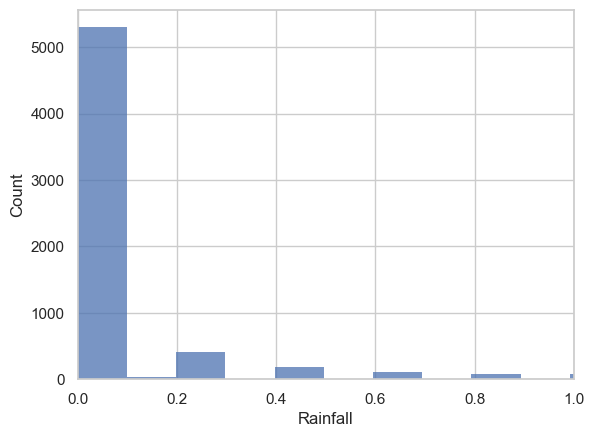

In [33]:
sns.histplot(data.Rainfall)
plt.xlim(0, 1);

In [34]:
data_rain_by_loc = data.groupby(by='Location').sum()
data_rain_by_loc = data_rain_by_loc[['RainToday']]
data_rain_by_loc.head()

,RainToday
Location,
Adelaide,44.0
Albury,199.0
Brisbane,135.0
CoffsHarbour,187.0
Darwin,33.0


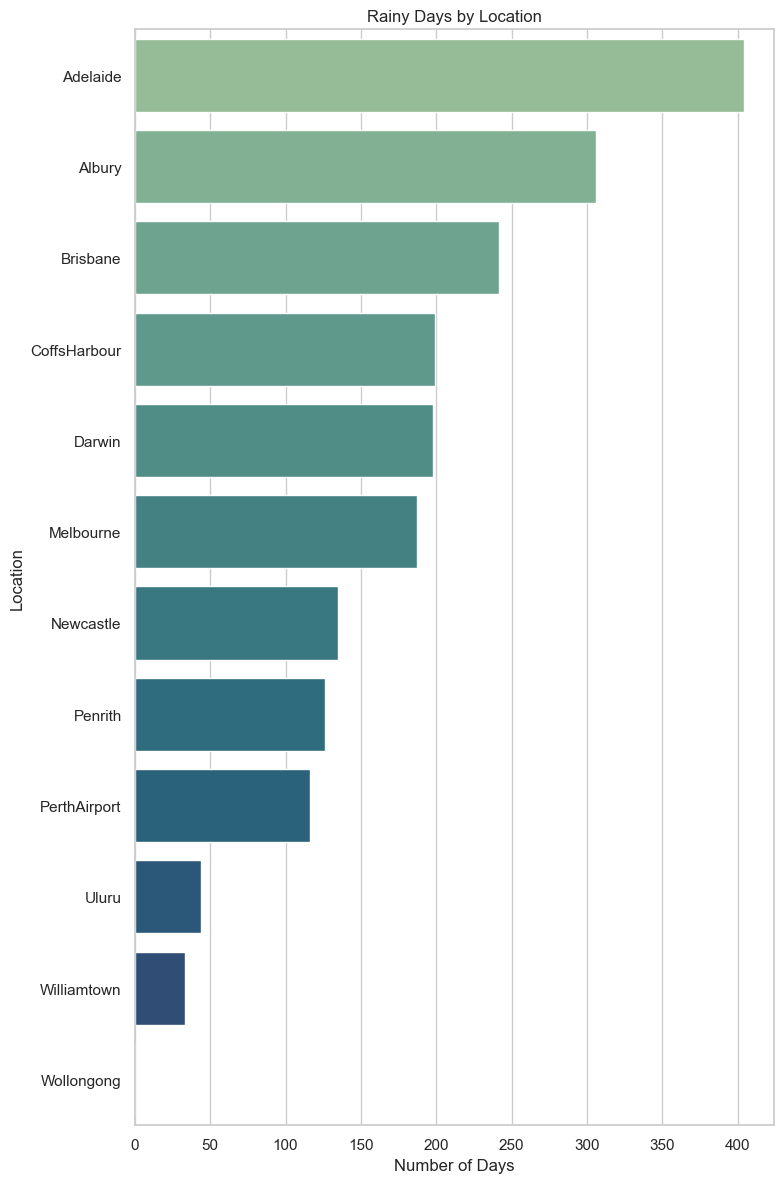

In [36]:
plt.figure(figsize=(8, 12))
sns.barplot(x='RainToday', 
            y=data_rain_by_loc.index, 
            data=data_rain_by_loc.sort_values('RainToday', ascending=False), 
            orient='h',
            palette='crest'
           )
plt.xlabel('Number of Days')
plt.title('Rainy Days by Location')
plt.tight_layout()

In [37]:
data.Location.value_counts()

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64

In [38]:
data_seasonality = data.copy()
data_seasonality['month'] = data_seasonality.Date.apply(lambda x: int(str(x)[5:7]))
data_seasonality[['Date', 'month']].head()

,Date,month
0,2008-12-01,12
1,2008-12-02,12
2,2008-12-03,12
3,2008-12-04,12
4,2008-12-05,12


In [39]:
data_seasonality_grouped = data_seasonality.groupby('month').mean()
data_seasonality_grouped[['RainToday']]

,RainToday
month,
1,0.179487
2,0.272120
3,0.243968
4,0.281090
5,0.211514
6,0.292135
7,0.228095
8,0.263079
9,0.240527


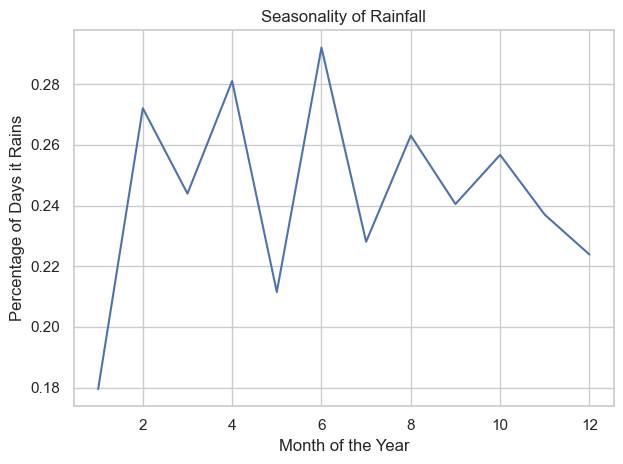

In [40]:
sns.lineplot(data=data_seasonality_grouped, x=data_seasonality_grouped.index, y='RainToday')
plt.title('Seasonality of Rainfall')
plt.xlabel('Month of the Year')
plt.ylabel('Percentage of Days it Rains')
plt.tight_layout()

Rainfall in Australia clearly has a degree of seasonality.

# Correlation

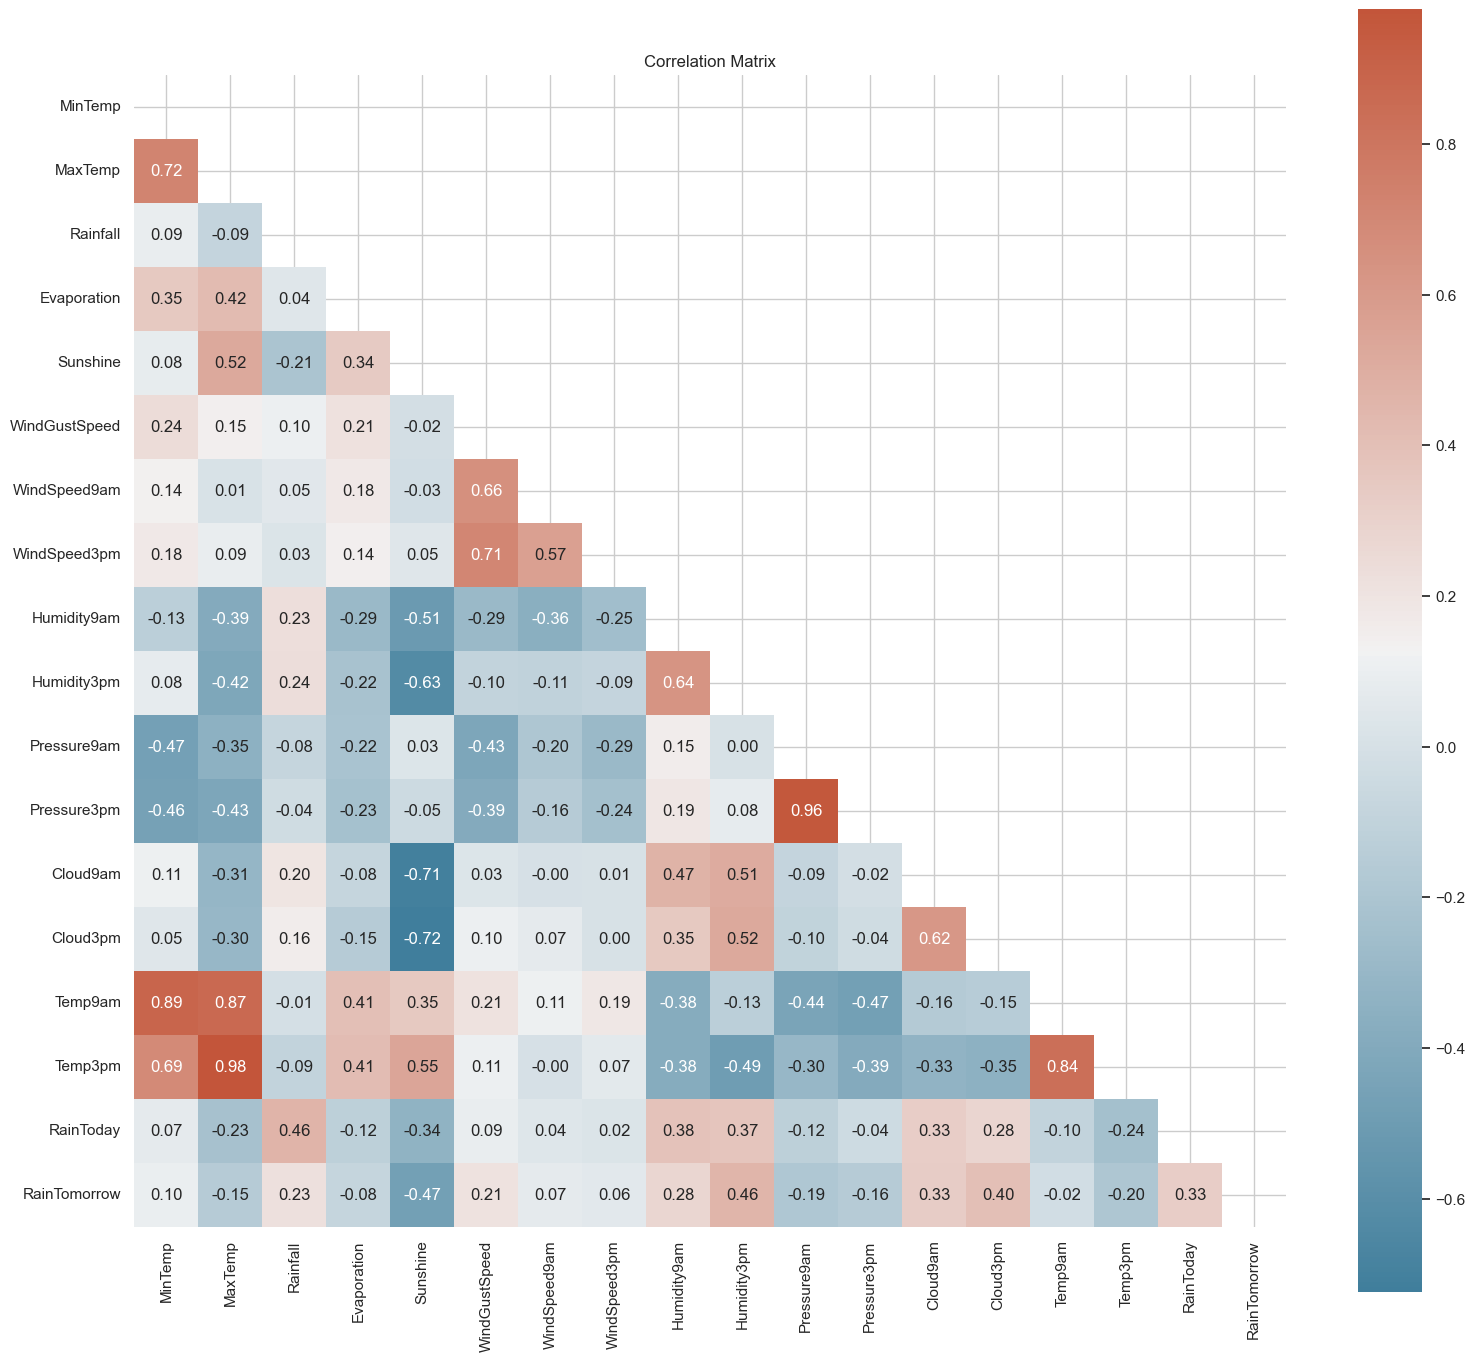

In [41]:
plt.figure(figsize=(16, 14))
plt.title('Correlation Matrix')

mask = np.triu(np.ones_like(data.corr()))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.2f', square=True, cmap=cmap)
plt.tight_layout()

Nothing in this correlation heatmap is surprising

Features with strong correlations either positive or negative.

# DataPreprocessing

In [42]:
data_imputed = data.dropna(axis=0, subset=['RainTomorrow'])
data_imputed.isna().sum()

Date                0
Location            0
MinTemp            60
MaxTemp            35
Rainfall          107
Evaporation      3419
Sunshine         3880
WindGustDir       953
WindGustSpeed     953
WindDir9am        809
WindDir3pm        286
WindSpeed9am       62
WindSpeed3pm       86
Humidity9am        44
Humidity3pm        83
Pressure9am      1292
Pressure3pm      1293
Cloud9am         2291
Cloud3pm         2331
Temp9am            41
Temp3pm            77
RainToday         107
RainTomorrow        0
dtype: int64

In [43]:
conti_feats = [col for col in data_imputed.columns if data_imputed[col].dtype != object]
conti_feats.remove('RainTomorrow')
conti_feats

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [46]:
impute = IterativeImputer(random_state=42)
data_imputed_cont = impute.fit_transform(data_imputed[conti_feats])
data_imputed_cont = pd.DataFrame(data_imputed_cont, columns=conti_feats)
data_imputed_cont.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,5.462407,6.498250,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,5.118398,16.9,21.8,0.0
1,7.4,25.1,0.0,5.932122,12.420220,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,1.023826,1.617162,17.2,24.3,0.0
2,12.9,25.7,0.0,7.357765,11.759469,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,2.121845,2.000000,21.0,23.2,0.0
3,9.2,28.0,0.0,5.323681,12.875563,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.446574,1.046166,18.1,26.5,0.0
4,17.5,32.3,1.0,5.458007,6.284260,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0


In [47]:
data_imputed_cont.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

# Categorical Features

In [49]:
cate_feats = [col for col in data_imputed.columns if col not in conti_feats]
cate_feats.remove('RainTomorrow')

# Also removing Date and Location since no values are missing
cate_feats.remove('Date')
cate_feats.remove('Location')
cate_feats

['WindGustDir', 'WindDir9am', 'WindDir3pm']

In [50]:
data_imputed_cat = data_imputed[cate_feats]

for col in data_imputed_cat.columns:
    values = data_imputed_cat.WindDir3pm.value_counts().reset_index()['index'].values
    probs = data_imputed_cat[col].value_counts(normalize=True).values
    data_imputed_cat[col].replace(np.nan, np.random.choice(a=values, p=probs), inplace=True)

data_imputed_cat.head()

,WindGustDir,WindDir9am,WindDir3pm
0,W,W,WNW
1,WNW,NNW,WSW
2,WSW,W,WSW
3,NE,SE,E
4,W,ENE,NW


In [51]:
data_imputed_cat.isna().sum()

WindGustDir    0
WindDir9am     0
WindDir3pm     0
dtype: int64

# Concatenating


Now that the missing values have been handled need to place all of the separated dataframes back together into one final dataframe.

In [53]:
data_date_loc = data_imputed[['Date', 'Location']]
data_target = data_imputed.RainTomorrow

print(data_date_loc.shape)
print(data_imputed_cont.shape)
print(data_imputed_cat.shape)
print(data_target.shape)

(8186, 2)
(8186, 17)
(8186, 3)
(8186,)


In [54]:
data_imputed_final = pd.concat(objs=[data_date_loc.reset_index(drop=True), 
                                   data_imputed_cont.reset_index(drop=True), 
                                   data_imputed_cat.reset_index(drop=True), 
                                   data_target.reset_index(drop=True)
                                  ], 
                             axis=1
                            )
data_imputed_final.shape

(8186, 23)

In [55]:
data_imputed_final.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,WindGustDir,WindDir9am,WindDir3pm,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.462407,6.498250,44.0,20.0,24.0,...,1007.1,8.000000,5.118398,16.9,21.8,0.0,W,W,WNW,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,5.932122,12.420220,44.0,4.0,22.0,...,1007.8,1.023826,1.617162,17.2,24.3,0.0,WNW,NNW,WSW,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,7.357765,11.759469,46.0,19.0,26.0,...,1008.7,2.121845,2.000000,21.0,23.2,0.0,WSW,W,WSW,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,5.323681,12.875563,24.0,11.0,9.0,...,1012.8,0.446574,1.046166,18.1,26.5,0.0,NE,SE,E,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,5.458007,6.284260,41.0,7.0,20.0,...,1006.0,7.000000,8.000000,17.8,29.7,0.0,W,ENE,NW,0.0


checking of missing values

In [56]:
data_imputed_final.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
WindGustDir      0
WindDir9am       0
WindDir3pm       0
RainTomorrow     0
dtype: int64

rainfall in Australia exhibits seasonality. so on behalf of using full date from the Date column, extracting just the month is much more valuable.

In [57]:
data_month = data_imputed_final.copy()
data_month.insert(1, 'Month', data_month.Date.apply(lambda x: int(str(x)[5:7])))
data_month.drop(columns='Date', inplace=True)
data_month.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,WindGustDir,WindDir9am,WindDir3pm,RainTomorrow
0,12,Albury,13.4,22.9,0.6,5.462407,6.498250,44.0,20.0,24.0,...,1007.1,8.000000,5.118398,16.9,21.8,0.0,W,W,WNW,0.0
1,12,Albury,7.4,25.1,0.0,5.932122,12.420220,44.0,4.0,22.0,...,1007.8,1.023826,1.617162,17.2,24.3,0.0,WNW,NNW,WSW,0.0
2,12,Albury,12.9,25.7,0.0,7.357765,11.759469,46.0,19.0,26.0,...,1008.7,2.121845,2.000000,21.0,23.2,0.0,WSW,W,WSW,0.0
3,12,Albury,9.2,28.0,0.0,5.323681,12.875563,24.0,11.0,9.0,...,1012.8,0.446574,1.046166,18.1,26.5,0.0,NE,SE,E,0.0
4,12,Albury,17.5,32.3,1.0,5.458007,6.284260,41.0,7.0,20.0,...,1006.0,7.000000,8.000000,17.8,29.7,0.0,W,ENE,NW,0.0


In [58]:
categorical = ['Month', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
data_dummies = pd.get_dummies(data_month, columns=categorical)
data_dummies.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,5.462407,6.498250,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,5.932122,12.420220,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,7.357765,11.759469,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,5.323681,12.875563,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,5.458007,6.284260,41.0,7.0,20.0,82.0,33.0,...,0,1,0,0,0,0,0,0,0,0


In [60]:
data_dummies.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'Month_1', 'Month_2',
       'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8',
       'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Location_Adelaide',
       'Location_Albury', 'Location_Brisbane', 'Location_CoffsHarbour',
       'Location_Darwin', 'Location_Melbourne', 'Location_Newcastle',
       'Location_Penrith', 'Location_PerthAirport', 'Location_Uluru',
       'Location_Williamtown', 'Location_Wollongong', 'WindGustDir_E',
       'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE',
       'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S',
       'WindGustDir_SE', 'WindGustDir_SSE', 'WindGustDir_SSW',
       'WindGustDir_SW', 'WindGustDir_W', 'WindGust

# Modeling

In [61]:
data_final = data_dummies.copy()
X = data_final.drop(columns='RainTomorrow')
y = data_final.RainTomorrow

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print('Train size:', X_train.shape[0])
print('Test size: ', X_test.shape[0])

Train size: 6139
Test size:  2047


In [89]:
logre = LogisticRegression(random_state=42)
logre.fit(X_train, y_train)
y_pred = logre.predict(X_test)
y_pred

array([0., 1., 1., ..., 0., 0., 0.])

In [87]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,RocCurveDisplay, classification_report

In [101]:
    # Classification Report
    print('Classification Report') 
    print('-'*53)
    print(classification_report(y_test, y_pred))
    print('\n')
    
    
    
  


Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      1559
         1.0       0.72      0.50      0.59       488

    accuracy                           0.83      2047
   macro avg       0.79      0.72      0.74      2047
weighted avg       0.82      0.83      0.82      2047





In [102]:
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train)

print('Original')
print('-'*20)
print(y_train.value_counts())
print('\n')
print('SMOTE')
print('-'*20)
print(pd.Series(y_train_resampled).value_counts())

Original
--------------------
0.0    4636
1.0    1503
Name: RainTomorrow, dtype: int64


SMOTE
--------------------
0.0    4636
1.0    4636
Name: RainTomorrow, dtype: int64


In [103]:
logre_smote = LogisticRegression(random_state=42)
logre_smote.fit(X_train_resampled, y_train_resampled)
y_pred_smote = logre_smote.predict(X_test)
y_pred_smote
 

array([0., 1., 1., ..., 0., 0., 0.])

In [105]:
    # Classification Report
    print('Classification Report') 
    print('-'*53)
    print(classification_report(y_test, y_pred))
    print('\n')

Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      1559
         1.0       0.72      0.50      0.59       488

    accuracy                           0.83      2047
   macro avg       0.79      0.72      0.74      2047
weighted avg       0.82      0.83      0.82      2047





# HyperParameter Tuning

In [106]:
logre_params = {
    'C': [1, 1e8, 1e16],
    'fit_intercept': [True, False],
    'max_iter': [50, 100, 150],
    'random_state': [42]
}

logre_gs = GridSearchCV(logre, logre_params, scoring='accuracy', cv=3)
logre_gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [1, 100000000.0, 1e+16],
                         'fit_intercept': [True, False],
                         'max_iter': [50, 100, 150], 'random_state': [42]},
             scoring='accuracy')

In [107]:
logre_gs.best_params_

{'C': 1, 'fit_intercept': False, 'max_iter': 150, 'random_state': 42}

In [108]:
round(logre_gs.best_score_, 4)

0.8327

# Decision Tree

In [111]:
cl = DecisionTreeClassifier(random_state=42)
cl.fit(X_train, y_train)
y_pred_tree = cl.predict(X_test)
y_pred_tree

array([1., 0., 1., ..., 1., 0., 0.])

# Hyperparameter Tuning

In [117]:
para = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 7, 11],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'random_state': [42]
}

cl_gs = GridSearchCV(cl, param_grid=para, scoring='accuracy', cv=3)
cl_gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 7, 11], 'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'random_state': [42]},
             scoring='accuracy')

In [118]:
cl_gs.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'random_state': 42}

In [119]:
round(cl_gs.best_score_, 4)

0.8224

# Random Forest

In [120]:
rfo = RandomForestClassifier(random_state=42)
rfo.fit(X_train, y_train)
y_pred_rfo = rfo.predict(X_test)
y_pred_rfo

array([0., 0., 1., ..., 1., 0., 0.])

# Hyperparameter Tuning

In [122]:
rfo_params = {
    'n_estimators': [10, 35, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 7, 11],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'random_state': [42]
}

rfo_gs = GridSearchCV(rfo, param_grid=rfo_params, scoring='accuracy', cv=3)
rfo_gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 7, 11], 'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 35, 100], 'random_state': [42]},
             scoring='accuracy')

In [123]:
rfo_gs.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100,
 'random_state': 42}

In [124]:
round(rfo_gs.best_score_, 4)

0.8534

# Feature Importance

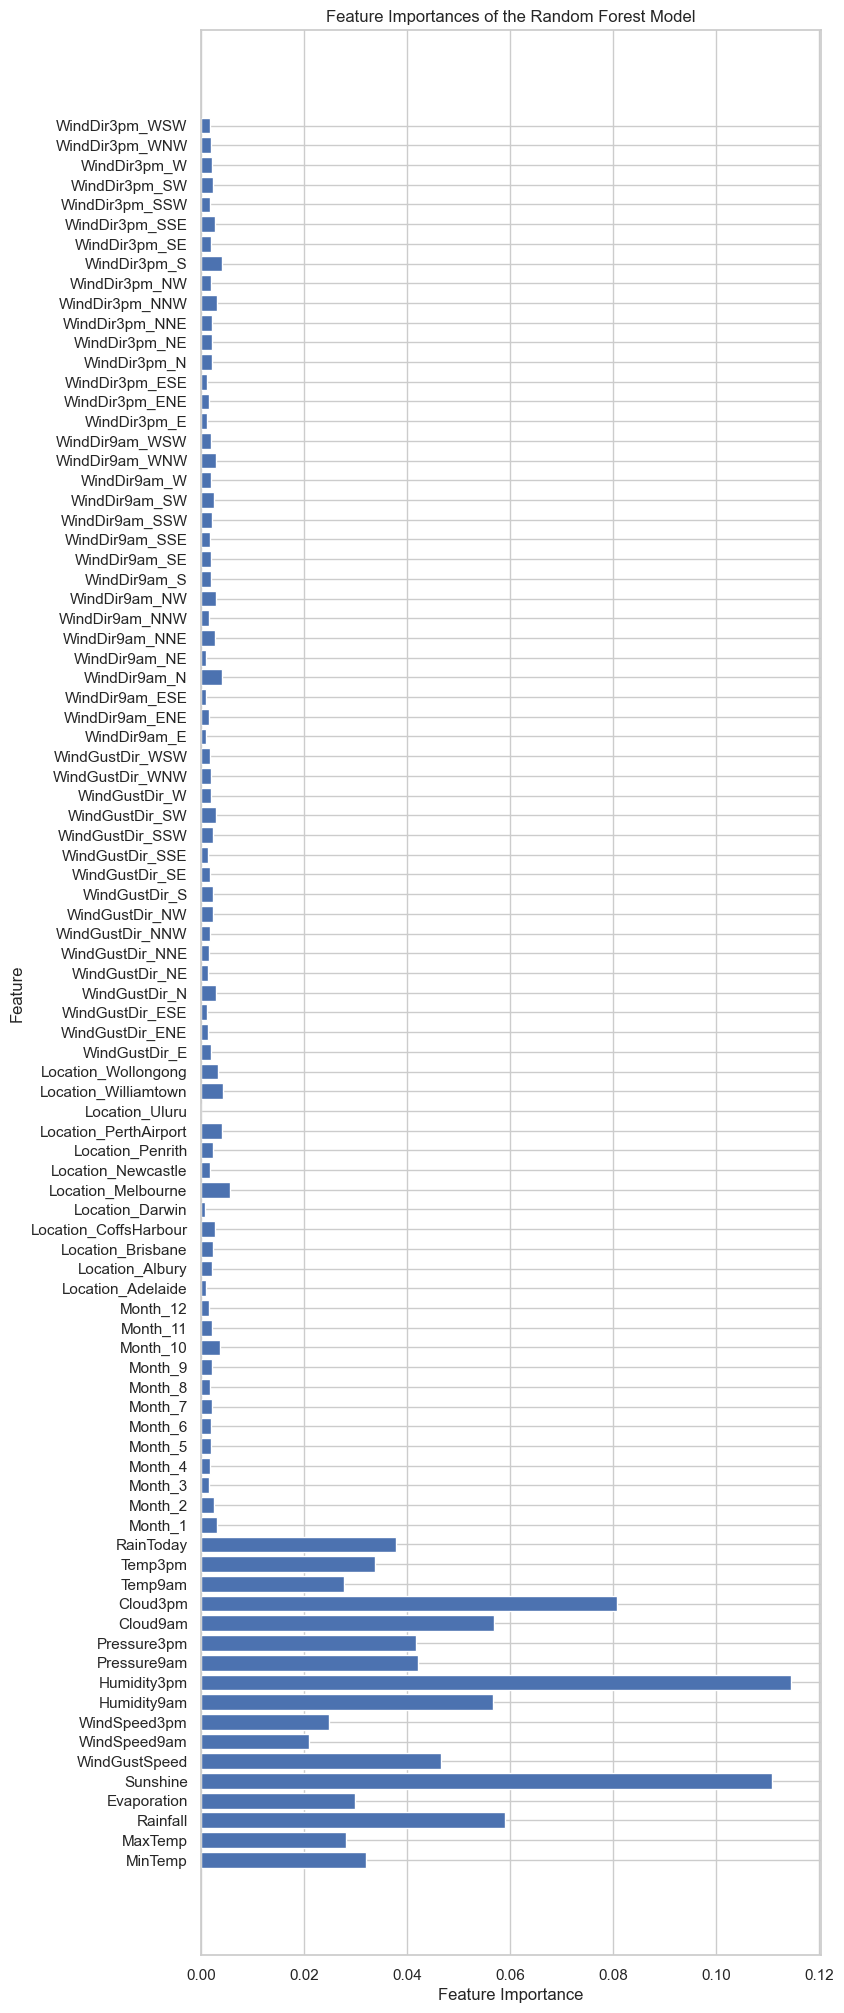

In [125]:
best_rfo = rfo_gs.best_estimator_

plt.figure(figsize=(8, 25))
plt.barh(range(best_rfo.n_features_in_), best_rfo.feature_importances_)
plt.yticks(np.arange(best_rfo.n_features_in_), X_train.columns.values)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances of the Random Forest Model');

In [126]:
feat_imp_data = pd.DataFrame(data={'Feature': data_final.columns.drop('RainTomorrow'),
                                 'Importance': best_rfo.feature_importances_
                                }
                           )
feat_imp_data['Group'] = feat_imp_data.Feature.apply(lambda x: x.split('_')[0])
feat_imp_data

,Feature,Importance,Group
0,MinTemp,0.031951,MinTemp
1,MaxTemp,0.028193,MaxTemp
2,Rainfall,0.058962,Rainfall
3,Evaporation,0.029884,Evaporation
4,Sunshine,0.110843,Sunshine
...,...,...,...
84,WindDir3pm_SSW,0.001703,WindDir3pm
85,WindDir3pm_SW,0.002403,WindDir3pm
86,WindDir3pm_W,0.002191,WindDir3pm
87,WindDir3pm_WNW,0.001945,WindDir3pm


In [127]:
feat_imp_data.Group.value_counts()

WindDir3pm       16
WindDir9am       16
WindGustDir      16
Location         12
Month            12
MaxTemp           1
RainToday         1
Temp3pm           1
Temp9am           1
Cloud3pm          1
Cloud9am          1
MinTemp           1
Pressure9am       1
Humidity3pm       1
Humidity9am       1
WindSpeed3pm      1
WindSpeed9am      1
WindGustSpeed     1
Sunshine          1
Evaporation       1
Rainfall          1
Pressure3pm       1
Name: Group, dtype: int64

Lambda function works as expected

In [129]:
feat_imp_data_grouped = feat_imp_data.groupby(by='Group').sum()
feat_imp_data_grouped.sort_values('Importance', ascending=False, inplace=True)
feat_imp_data_grouped

,Importance
Group,
Humidity3pm,0.114550
Sunshine,0.110843
Cloud3pm,0.080678
Rainfall,0.058962
Cloud9am,0.056774
Humidity9am,0.056767
WindGustSpeed,0.046516
Pressure9am,0.042176
Pressure3pm,0.041648


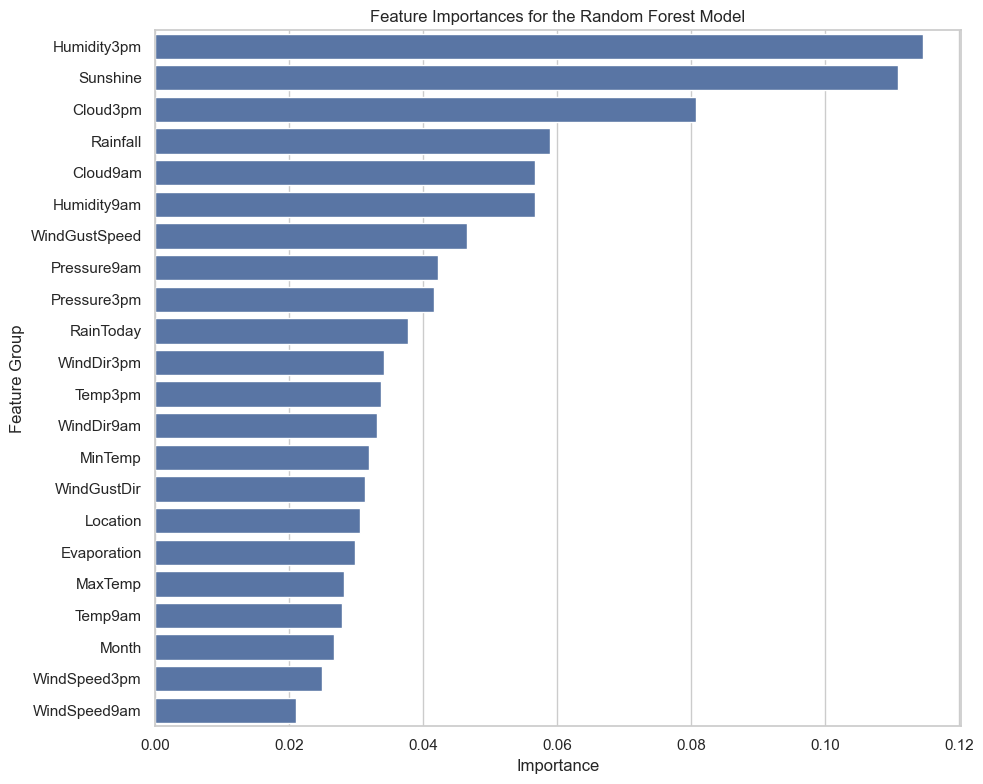

In [131]:
plt.figure(figsize=(10, 8))
sns.barplot(y=feat_imp_data_grouped.index,
            x=feat_imp_data_grouped.Importance,
            orient='h',
            color=sns.color_palette()[0]
           )
plt.title('Feature Importances for the Random Forest Model')
plt.ylabel('Feature Group')
plt.xlabel('Importance')
plt.tight_layout()

# Model Comparision

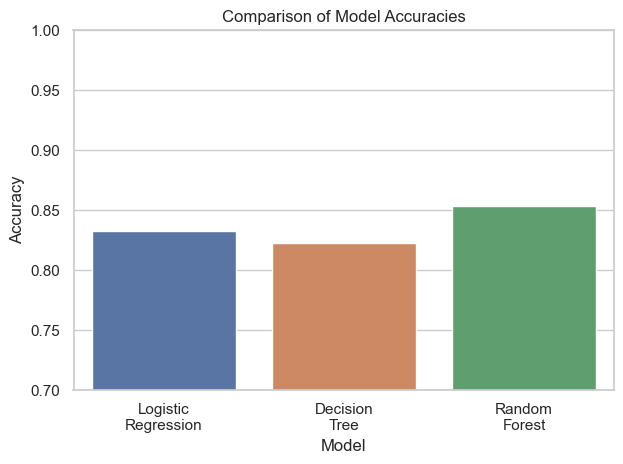

In [132]:
models = [logre_gs, cl_gs, rfo_gs]

sns.barplot(x=['Logistic\nRegression', 'Decision\nTree', 'Random\nForest'],
            y=[model.best_score_ for model in models]
           )
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)
plt.title('Comparison of Model Accuracies')
plt.tight_layout()

# Results

The best performing model is the hyperparameter-tuned Random Forest model with an accuracy of approximately 85%